# Exercise 7

# Part 1 - DT

## Capital Bikeshare data

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day


- Lupe Pinzon - 200813063
- Javier Lesmes - 200820243
- Viviana Muñoz - 201920081


In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [5]:
# read the data and set "datetime" as the index
bikes = pd.read_csv('bikeshare.csv', index_col='datetime', parse_dates=True)

In [6]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)

In [7]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour

In [5]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [6]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [7]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()


workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

#### *CONCLUSIÓN 7.1.a* : 
Basados en el analisis de las medias los días entre semana (weekdays) se rentan en promedio mayor número de bicicletas que los weekends/holidays.

In [8]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

#### *CONCLUSIÓN 7.1.b* : 
La cantidad promedio de retals no es lineal en el día, se presentan picos y valles siento las 17:00 la hora del día con la mayor cantidad promedio (468) mientras que las horas 3am y 4 am son las horas de menor rentals promedio.

# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

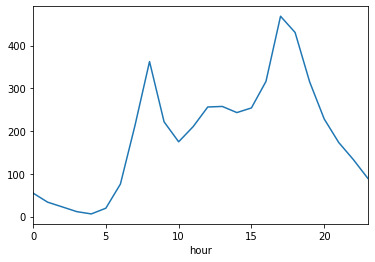

In [9]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot();

Plot for workingday == 0 and workingday == 1

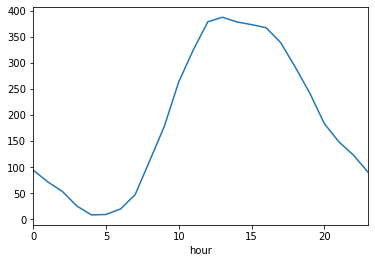

In [10]:
# hourly rental trend for "workingday=0"
bikes[bikes.workingday==0].groupby('hour').total.mean().plot();

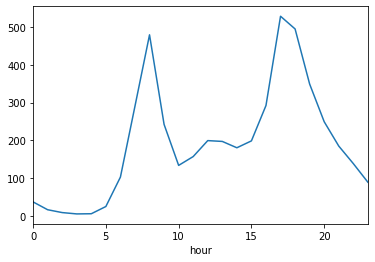

In [11]:
# hourly rental trend for "workingday=1"
bikes[bikes.workingday==1].groupby('hour').total.mean().plot();

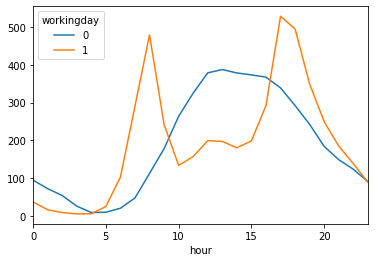

In [12]:
# combine the two plots
bikes.groupby(['hour', 'workingday']).total.mean().unstack().plot();

Write about your findings

#### CONCLUSIÓN 7.2 :
El comportamiento de los rentals promedio varian en función del tipo de día al que pertence la hora; así para los días laborales los picos de renta de bicicletas se presentan a las 8 am y a las 6 pm; mientras que los fines de semana el comportamiento es más constante iniciando el incremento del rental promedio a las 8 am, incrementandose a las 13:00 y presentando un decrecimiento constante a partir de las 18:00 hasta finalizar el día.

Este comportamiento en días laborales corresponde con el incio y finalización de las jornadas laborales tradicionales.


# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

In [14]:
# linear regression model
from sklearn import linear_model
import statsmodels.api as sm

df=bikes[['hour','workingday','total']]
x=bikes[['hour','workingday']] #features
y=bikes[['total']]   

modelo = linear_model.LinearRegression()
modelo.fit(x,y)

print('Coefficients: \n', modelo.coef_)

Coefficients: 
 [[10.49206282  4.07248627]]


### Interpretación de coeficientes

La ecuación de regresión es: 

### $$Y_ = \beta_067.705950269x + \beta_110.49206282x + \beta_24.07248627x$$


Coeficientes; por cada 10.4 unidades que aumenta B1 (hour) aumenta en una unidad el total de rentals de Capital Bikes; en cambio por cada 24 unidades que aumenta B2 (Workingday) el rental aumenta en 1 unidad, luego entonces la hora esta mas correlacionada con el cambio en Y. 



### LRM Limitaciones
- Asume una relación de tipo lineal entre las variables regresoras (hour & workingday) con la variable de respuesta total bike´s rentals
- LRM no puede aprender automaticamente la relación entre las variables por ser un algoritmo supervisado.

# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.



###### Alistamiento de los datos

In [218]:
max_depth = 6 ## numero de parada
num_pct = 10 #numero percentilen los que partir la variable
max_features = None 
min_gain=0.001 #parada stop


In [219]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz

#Cargue dataset original
bikes = pd.read_csv('bikeshare.csv', index_col=0, parse_dates=True)
bikes.rename(columns={'count':'total'}, inplace=True)
bikes['hour'] = bikes.index.hour
bikes.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [220]:
bikes.reset_index(inplace=True)
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [221]:
bikes.dropna(inplace=True)
j = 0
print(X.columns[j])

timedelta


In [222]:
bikes['total'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: total, dtype: float64

In [223]:
# define X and y
X = bikes[['hour','workingday']]
y = (bikes.total > 145).astype(int)

In [224]:
X.columns

Index(['hour', 'workingday'], dtype='object')

In [225]:
splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
# Only unique values for filter binary and few unique values features
splits = np.unique(splits)
splits

array([ 0.,  2.,  4.,  7.,  9., 12., 14., 16., 19., 21.])

In [226]:
k = 5
splits[k]
# División del dataset
filter_l = X.iloc[:, j] < splits[k] # dividir DATASET en dos 
y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

### GINI 

In [227]:
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [228]:
# Gini izquierdo (lefth)
gini_l = gini(y_l)
gini_l

0.4099189270957957

In [230]:
# Gini derecho (right)
gini_r = gini(y_r)
gini_r

0.4131944444444444

In [231]:
def gini_impurity(X_col, y, split):
    "Calculate the gain of an split k on feature j"
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    #numero observaciones a cada lado
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

gini_impurity(X.iloc[:, j], y, splits[k])
splits[k]

12.0

In [232]:
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1]-1)
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # For all features
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # For all splits
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

X.columns[j]

'hour'

In [233]:
# Mejor split a las observaciones 
j, split, gain = best_split(X, y, splits[k])
j, split, gain

(0, 7.0, 0.18158798684458927)

In [234]:
filter_l = X.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]
split 

7.0

In [235]:
y.mean(), y_l.mean(), y_r.mean()

(0.49917325004593055, 0.02580439630455559, 0.6909771524461081)

In [236]:
# Cantidad de observaciones para cada lado 
y.shape[0], y_l.shape[0], y_r.shape[0]

(10886, 3139, 7747)

In [237]:
# FUNCIÓN RECURSIVA

def tree_grow(X, y, level=6, min_gain=0.001, max_depth=6, num_pct=10):
    
    # If only one observation
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calculate the best split
    j, split, gain = best_split(X, y, num_pct)
    
    # save tree and estimate prediction
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Laplace correction
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    
    # Check stooping criteria
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # No stooping criteria was meet, then continue to create the partition
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Next iteration to each split
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [238]:
tree_grow(X, y, level=0, min_gain=0.001, max_depth=1, num_pct=10)

{'y_pred': 0,
 'y_prob': 0.49917340191036,
 'level': 0,
 'split': [0, 8.0],
 'n_samples': 10886,
 'gain': 0.16178755449047394,
 'sl': {'y_pred': 0,
  'y_prob': 0.0942714126807564,
  'level': 1,
  'split': -1,
  'n_samples': 3594,
  'gain': 0.06425451863089747},
 'sr': {'y_pred': 1,
  'y_prob': 0.6987935289278859,
  'level': 1,
  'split': -1,
  'n_samples': 7292,
  'gain': 0.048169131630109496}}

In [239]:
tree = tree_grow(X, y, level=0, min_gain=0.001, max_depth=6, num_pct=10)
tree

{'y_pred': 0,
 'y_prob': 0.49917340191036,
 'level': 0,
 'split': [0, 8.0],
 'n_samples': 10886,
 'gain': 0.16178755449047394,
 'sl': {'y_pred': 0,
  'y_prob': 0.0942714126807564,
  'level': 1,
  'split': [0, 7.0],
  'n_samples': 3594,
  'gain': 0.06425451863089747,
  'sl': {'y_pred': 0,
   'y_prob': 0.026106335561922954,
   'level': 2,
   'split': [0, 6.0],
   'n_samples': 3139,
   'gain': 0.0027878761479700337,
   'sl': {'y_pred': 0,
    'y_prob': 0.010796723752792257,
    'level': 3,
    'split': -1,
    'n_samples': 2684,
    'gain': 0.0008089140964271449},
   'sr': {'y_pred': 0,
    'y_prob': 0.11816192560175055,
    'level': 3,
    'split': -1,
    'n_samples': 455,
    'gain': 0}},
  'sr': {'y_pred': 1,
   'y_prob': 0.5645514223194749,
   'level': 2,
   'split': -1,
   'n_samples': 455,
   'gain': 0}},
 'sr': {'y_pred': 1,
  'y_prob': 0.6987935289278859,
  'level': 1,
  'split': [0, 22.0],
  'n_samples': 7292,
  'gain': 0.048169131630109496,
  'sl': {'y_pred': 1,
   'y_prob': 0.

### Prediction

In [240]:
def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Check if final node
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # If left node is empty only continue with right
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  # If right node is empty only continue with left
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted    

In [241]:
# Retorna la clasificación del pronostico
predic=tree_predict(X, tree)

In [242]:
np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct)).tolist())

array([ 0.,  2.,  4.,  7.,  9., 12., 14., 16., 19., 21.])

In [243]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y, predic) 
print('Test MSE: %.3f' % error)

Test MSE: 0.192


# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import warnings

In [95]:
# Definción de variables para arbol
feature  =  [ 'workingday' ,  'hour'] 
X =bikes[feature] 
y = bikes['total'] 
y.head()
X.head()


,workingday,hour
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [147]:
# lOOP para ajuste de modelo basado en hiperparametro max_depth 
max_depth_range = range(1,7)

# list to store the average RMSE for each value of max_depth
mean_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
for depth in max_depth_range:
    
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    mean_scores.append(cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error').mean())
mean_scores

[-23999.045644590173,
 -21638.47027467516,
 -19933.014372022844,
 -18769.533795568655,
 -15270.381581865198,
 -13351.093232703002]

Text(0, 0.5, 'mean_scores(lower is better)')

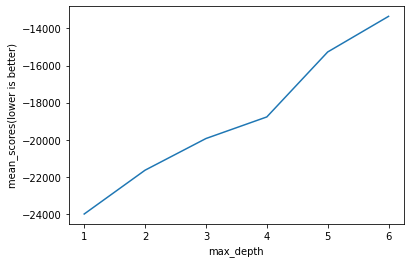

In [149]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot  
plt.plot(max_depth_range, mean_scores)
plt.xlabel('max_depth')
plt.ylabel('mean_scores(lower is better)')


In [141]:
treereg . fit ( X ,  y )

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [142]:
# Mejor AUC y su correspondiente hiperparametro max_depth
sorted(zip(mean_scores, max_depth_range))[::-1][0]

(-13351.093232703002, 6)

In [143]:
y_hat = treereg.predict(X)

In [144]:
# Calculo del MSE
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y, y_hat) 
print('Test MSE: %.3f' % error)


Test MSE: 11546.784


In [102]:
# calcular las características importances 
pd.DataFrame({'feature':feature, 'importance':treereg.feature_importances_})

,feature,importance
0,workingday,0.15932
1,hour,0.84068


- El arbol de clasificación muestra como la variable más importante en su predicción es la hour.


# AGREGAR ANALISIS

# Part 2 - Bagging

## Mashable news stories analysis

Predicting if a news story is going to be popular

In [150]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [151]:
df = pd.read_csv('mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [152]:
df.shape

(6000, 61)

In [153]:
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']

In [154]:
y.mean()

0.5

In [156]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Exercise 7.6

Estimate a Decision Tree Classifier and a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [158]:
# Arbol de clasificación 
clf = DecisionTreeClassifier(max_depth=None, random_state=123)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [160]:
#Predict
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [161]:
tabla = np.array([np.arange(5)]*2).T
columns = ['Accuracy','F1_Score']
models = ['Dtc','Logistic','Bagging','Bagging_w','Bagging_s']
Results = pd.DataFrame(tabla, index=models, columns=columns)
Results

,Accuracy,F1_Score
Dtc,0,0
Logistic,1,1
Bagging,2,2
Bagging_w,3,3
Bagging_s,4,4


In [163]:
# Evaluación del modelo de clasificación - Arboles de decisión

#Accuracy
Results.iloc[0,0] = metrics.accuracy_score(y_pred, y_test)
print('Accuracy_dt=',metrics.accuracy_score(y_pred, y_test))
#F1 Score
Results.iloc[0,1] = metrics.f1_score(y_pred, y_test)
print('f1_dt=',metrics.f1_score(y_pred, y_test))


Accuracy_dt= 0.5406666666666666
f1_dt= 0.5428002654280026


## B. Logistic Regression

In [165]:
lr = LogisticRegression(random_state=123)
lr.fit(X_train, y_train)

D:\Viviana_Mc\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [167]:
#Predict
y_pred2=lr.predict(X_test)
y_pred2

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [168]:
#Accuracy
Results.iloc[1,0] = metrics.accuracy_score(y_pred2, y_test)
print('Accuracy_lr=',metrics.accuracy_score(y_pred2, y_test))

#F1 Score
Results.iloc[1,1] = metrics.f1_score(y_pred2, y_test)
print('f1_lr=',metrics.f1_score(y_pred2, y_test))

Accuracy_lr= 0.6273333333333333
f1_lr= 0.6104529616724739


# Exercise 7.7

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

In [169]:
#Samples
n_estimators = 100
# set a seed for reproducibility
np.random.seed(123)

n_samples = X_train.shape[0]

# create bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

In [170]:
#Estimations model
trees1 = {}
for i in range(n_estimators):
    trees1[i] = DecisionTreeClassifier(max_depth=None, random_state=123)
    trees1[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [171]:
# Predict - Test
y_pred_df1 = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df1.iloc[:, i] = trees1[i].predict(X_test)

y_pred_df1.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,1,1,0,0,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,1,0,1,0,1,1,0,...,1,0,1,1,0,1,1,1,1,1
2520,1,0,0,0,1,1,1,1,0,0,...,1,1,1,0,1,0,1,0,1,1
3721,1,0,1,0,1,1,1,0,1,1,...,1,1,1,1,0,1,0,1,1,1
3727,0,0,0,0,1,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [172]:
y_pred_df1.tail()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
3077,1,1,0,0,1,1,0,1,0,0,...,0,1,1,0,0,1,0,0,0,0
5166,1,0,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
2227,1,1,0,1,0,1,1,0,1,1,...,0,1,1,0,1,1,1,1,1,1
5684,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,1,1,1,0,0,1
1937,0,0,0,1,0,0,0,1,1,1,...,0,1,0,1,0,0,0,0,0,1


Estimate the oob error of each classifier

In [174]:
samples1_oob = []
# show the "out-of-bag" observations for each sample
for sample in samples:
    samples1_oob.append(sorted(set(range(n_samples)) - set(sample)))

In [175]:
errors1 = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees1[i].predict(X_train.iloc[samples1_oob[i]])
    errors1[i] = 1 - metrics.accuracy_score(y_train.iloc[samples1_oob[i]], y_pred_)

In [176]:
samples1_oob = []
# show the "out-of-bag" observations for each sample
for sample in samples:
    samples1_oob.append(sorted(set(range(n_samples)) - set(sample)))

#Estimate the oob error of each classifier

errors1 = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees1[i].predict(X_train.iloc[samples1_oob[i]])
    errors1[i] = 1 - metrics.accuracy_score(y_train.iloc[samples1_oob[i]], y_pred_)

In [177]:
errors1

array([0.45200486, 0.432     , 0.45900658, 0.45119705, 0.44504182,
       0.41036585, 0.44665461, 0.45323741, 0.44569733, 0.45717732,
       0.44396285, 0.43768634, 0.45957447, 0.43697479, 0.4137931 ,
       0.43357934, 0.44365362, 0.43107618, 0.43413174, 0.43345324,
       0.44218942, 0.42532855, 0.43259437, 0.45660147, 0.43359142,
       0.44236572, 0.44852071, 0.45274212, 0.44229607, 0.43274498,
       0.43520193, 0.4439759 , 0.43353293, 0.43844754, 0.45560318,
       0.45181093, 0.46167665, 0.42674772, 0.43992827, 0.45772947,
       0.43780193, 0.43204748, 0.44927536, 0.43231707, 0.45543946,
       0.44199881, 0.43239951, 0.43433109, 0.44696067, 0.44089264,
       0.44009351, 0.42761557, 0.44384384, 0.43961353, 0.42314758,
       0.45800123, 0.45138055, 0.44748027, 0.45532436, 0.45311555,
       0.44256348, 0.45750452, 0.4231454 , 0.4369697 , 0.45035885,
       0.41283293, 0.47206875, 0.42394624, 0.43946731, 0.45105105,
       0.42976689, 0.44151868, 0.41908213, 0.42629969, 0.45530

In [178]:
# Predict 2 - Train
X_train_2_1 = pd.DataFrame(index=X_train.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    X_train_2_1.iloc[:, i] = trees1[i].predict(X_train)

X_train_2_1.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2420,1,1,1,1,1,0,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
1225,1,0,1,0,1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
324,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
5863,1,1,1,1,1,1,1,1,0,1,...,0,1,0,1,1,1,1,1,1,1
86,0,1,0,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,0


#### Decision Trees where max_depth=2

In [179]:
#Samples
n_estimators = 100
# set a seed for reproducibility
np.random.seed(123)

n_samples = X_train.shape[0]

# create bootstrap samples (will be used to select rows from the DataFrame)
samples2 = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

In [180]:
#Estimations model

trees2 = {}
for i in range(n_estimators):
    trees2[i] = DecisionTreeClassifier(max_depth=2, random_state=123)
    trees2[i].fit(X_train.iloc[samples2[i]], y_train.iloc[samples2[i]])

In [181]:
# Predict - Test 
y_pred_df2 = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df2.iloc[:, i] = trees2[i].predict(X_test)

y_pred_df2.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2520,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3721,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Estimate the oob error of each classifier

In [182]:
samples2_oob = []
# show the "out-of-bag" observations for each sample
for sample in samples2:
    samples2_oob.append(sorted(set(range(n_samples)) - set(sample)))

In [ ]:
errors2 = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees2[i].predict(X_train.iloc[samples2_oob[i]])
    errors2[i] = 1 - metrics.accuracy_score(y_train.iloc[samples2_oob[i]], y_pred_)

In [183]:
samples2_oob = []
# show the "out-of-bag" observations for each sample
for sample in samples2:
    samples2_oob.append(sorted(set(range(n_samples)) - set(sample)))

#Estimate the oob error of each classifier

errors2 = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees2[i].predict(X_train.iloc[samples2_oob[i]])
    errors2[i] = 1 - metrics.accuracy_score(y_train.iloc[samples2_oob[i]], y_pred_)

In [184]:
errors2

array([0.35905225, 0.368     , 0.37163375, 0.36832413, 0.39665472,
       0.3804878 , 0.37191079, 0.37230216, 0.37626113, 0.36369119,
       0.3752322 , 0.36493739, 0.38541033, 0.37995198, 0.36176649,
       0.37146371, 0.37188612, 0.37484885, 0.37724551, 0.37829736,
       0.3696187 , 0.38410992, 0.37207909, 0.38080685, 0.38177487,
       0.38080869, 0.37928994, 0.37339557, 0.36435045, 0.37796713,
       0.39421338, 0.38373494, 0.38742515, 0.37355973, 0.3821188 ,
       0.3572744 , 0.3748503 , 0.37203647, 0.39151225, 0.38405797,
       0.38707729, 0.39762611, 0.39855072, 0.39268293, 0.3952059 ,
       0.37477692, 0.36053593, 0.39156995, 0.40047676, 0.37454765,
       0.38340152, 0.37104623, 0.38438438, 0.35748792, 0.36558481,
       0.36848559, 0.38055222, 0.37765634, 0.39290086, 0.37628554,
       0.37787183, 0.3960217 , 0.38872404, 0.37575758, 0.35167464,
       0.36501211, 0.37998772, 0.36652413, 0.37106538, 0.37357357,
       0.38254632, 0.37966932, 0.36714976, 0.38165138, 0.38557

In [185]:
# Predict 2 - Train
X_train_2_2 = pd.DataFrame(index=X_train.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    X_train_2_2.iloc[:, i] = trees2[i].predict(X_train)

X_train_2_2.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2420,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1225,1,1,1,1,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
324,1,0,0,1,0,0,0,1,1,0,...,1,0,1,0,0,1,0,0,0,0
5863,1,1,1,1,0,0,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
86,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


#### Logistic Regressions

In [186]:
#Samples
n_estimators = 100
# set a seed for reproducibility
np.random.seed(123)

n_samples = X_train.shape[0]

# create bootstrap samples (will be used to select rows from the DataFrame)
samples3 = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

In [187]:
#Estimations model
trees3 = {}
for i in range(n_estimators):
    trees3[i] = LogisticRegression(random_state=123, max_iter=2000)
    trees3[i].fit(X_train.iloc[samples3[i]], y_train.iloc[samples3[i]])

D:\Viviana_Mc\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Viviana_Mc\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Viviana_Mc\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Viviana_Mc\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Viviana_Mc\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Viviana_Mc\lib\site-pa

D:\Viviana_Mc\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Viviana_Mc\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Viviana_Mc\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Viviana_Mc\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Viviana_Mc\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Viviana_Mc\lib\site-pa

D:\Viviana_Mc\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Viviana_Mc\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Viviana_Mc\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Viviana_Mc\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Viviana_Mc\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Viviana_Mc\lib\site-pa

In [188]:
# Predict - Test
y_pred_df3 = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df3.iloc[:, i] = trees3[i].predict(X_test)

y_pred_df3.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2520,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3721,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Estimate the oob error of each classifier

In [189]:
samples3_oob = []
# show the "out-of-bag" observations for each sample
for sample in samples3:
    samples3_oob.append(sorted(set(range(n_samples)) - set(sample)))

In [190]:
errors3 = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees3[i].predict(X_train.iloc[samples3_oob[i]])
    errors3[i] = 1 - metrics.accuracy_score(y_train.iloc[samples3_oob[i]], y_pred_)

In [191]:
samples3_oob = []
# show the "out-of-bag" observations for each sample
for sample in samples3:
    samples3_oob.append(sorted(set(range(n_samples)) - set(sample)))

#Estimate the oob error of each classifier

errors3 = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees3[i].predict(X_train.iloc[samples3_oob[i]])
    errors3[i] = 1 - metrics.accuracy_score(y_train.iloc[samples3_oob[i]], y_pred_)

In [192]:
errors3

array([0.35358445, 0.35015385, 0.38779174, 0.37569061, 0.3864994 ,
       0.36585366, 0.38034961, 0.36870504, 0.37922849, 0.36731001,
       0.37770898, 0.37686345, 0.3781155 , 0.37214886, 0.37205082,
       0.37576876, 0.39145907, 0.36577993, 0.38742515, 0.36810552,
       0.37945879, 0.38470729, 0.37687238, 0.37102689, 0.38296605,
       0.37839469, 0.37218935, 0.3663944 , 0.38610272, 0.3889227 ,
       0.39662447, 0.36807229, 0.37305389, 0.38932686, 0.36129822,
       0.36771025, 0.38323353, 0.37325228, 0.3861327 , 0.38888889,
       0.39070048, 0.38753709, 0.39251208, 0.37378049, 0.38229871,
       0.38845925, 0.3593179 , 0.38423946, 0.37187128, 0.36489747,
       0.38457043, 0.36374696, 0.37597598, 0.3544686 , 0.37660747,
       0.36848559, 0.37935174, 0.36976321, 0.39045288, 0.38535995,
       0.37001209, 0.37130802, 0.3958457 , 0.38909091, 0.36363636,
       0.37469734, 0.37077962, 0.37568723, 0.37530266, 0.37237237,
       0.37836222, 0.38640539, 0.36413043, 0.37614679, 0.38974

In [193]:
# Predict 2 - Train
X_train_2_3 = pd.DataFrame(index=X_train.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    X_train_2_3.iloc[:, i] = trees3[i].predict(X_train)

X_train_2_3.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2420,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1225,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
324,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5863,1,1,1,1,1,1,1,0,1,1,...,0,1,1,1,1,1,1,1,1,1
86,1,1,0,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,0,1


# Exercise 7.8

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [194]:
y_pred_dfp=pd.merge(y_pred_df1, y_pred_df2, how="outer", left_index=True, right_index=True)
y_pred_dfp

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,90_y,91_y,92_y,93_y,94_y,95_y,96_y,97_y,98_y,99_y
1483,1,1,0,0,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,1,0,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1
2520,1,0,0,0,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
3721,1,0,1,0,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4524,0,0,0,1,0,0,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
234,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4735,1,1,1,1,0,1,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
5839,0,1,0,0,1,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2939,0,0,1,1,1,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1


In [195]:
y_pred_df=pd.merge(y_pred_dfp, y_pred_df3, how="outer", left_index=True, right_index=True)
y_pred_df

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,90,91,92,93,94,95,96,97,98,99
1483,1,1,0,0,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,1,0,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1
2520,1,0,0,0,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
3721,1,0,1,0,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4524,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4735,1,1,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5839,0,1,0,0,1,1,1,0,1,0,...,0,0,1,1,0,1,0,1,1,0
2939,0,0,1,1,1,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1


In [196]:
y_pred_df.sum(axis=1)[:10]

1483    283
2185    262
2520    252
3721    275
3727     21
4524    156
234      18
4735     58
5839    113
2939    253
dtype: int64

In [198]:
#Predict ensamble
y_pred3 = (y_pred_df.sum(axis=1) >= ((n_estimators*3) / 2)).astype(np.int)

In [199]:
#Accuracy
Results.iloc[2,0] = metrics.accuracy_score(y_pred3, y_test)
print('Accuracy_bagging=',metrics.accuracy_score(y_pred3, y_test))
#F1 score
Results.iloc[2,1] = metrics.f1_score(y_pred3, y_test)
print('f1_bagging=',metrics.f1_score(y_pred3, y_test))

Accuracy_bagging= 0.6353333333333333
f1_bagging= 0.6224982746721878


# Exercise 7.9

Estimate te probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

In [200]:
n_estimators=n_estimators*3
y_pred4 = y_pred_df.sum(axis=1)/n_estimators
precision, recall, thresholds = precision_recall_curve(y_test,y_pred4)

In [201]:
f1_scores=2*recall*precision/(recall+precision)
print('best threshold= ', thresholds[np.argmax(f1_scores)])
print('f1 score*= ', np.max(f1_scores))

best threshold=  0.13333333333333333
f1 score*=  0.7103377686796316


# Exercise 7.10

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [202]:
errors = np.concatenate((errors1, errors2, errors3))
errors

array([0.45200486, 0.432     , 0.45900658, 0.45119705, 0.44504182,
       0.41036585, 0.44665461, 0.45323741, 0.44569733, 0.45717732,
       0.44396285, 0.43768634, 0.45957447, 0.43697479, 0.4137931 ,
       0.43357934, 0.44365362, 0.43107618, 0.43413174, 0.43345324,
       0.44218942, 0.42532855, 0.43259437, 0.45660147, 0.43359142,
       0.44236572, 0.44852071, 0.45274212, 0.44229607, 0.43274498,
       0.43520193, 0.4439759 , 0.43353293, 0.43844754, 0.45560318,
       0.45181093, 0.46167665, 0.42674772, 0.43992827, 0.45772947,
       0.43780193, 0.43204748, 0.44927536, 0.43231707, 0.45543946,
       0.44199881, 0.43239951, 0.43433109, 0.44696067, 0.44089264,
       0.44009351, 0.42761557, 0.44384384, 0.43961353, 0.42314758,
       0.45800123, 0.45138055, 0.44748027, 0.45532436, 0.45311555,
       0.44256348, 0.45750452, 0.4231454 , 0.4369697 , 0.45035885,
       0.41283293, 0.47206875, 0.42394624, 0.43946731, 0.45105105,
       0.42976689, 0.44151868, 0.41908213, 0.42629969, 0.45530

Text(0.5, 1.0, 'OOB error of each tree')

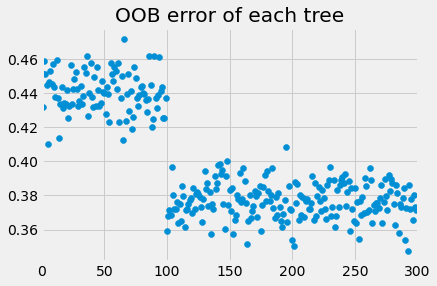

In [203]:
n_estimators=300

plt.scatter(range(n_estimators), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each tree')

Estimate $\alpha$

In [206]:
alpha = (1 - errors) / (1 - errors).sum()

In [207]:
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)

In [209]:
weighted_sum_1.head(10)

1483    0.947580
2185    0.882653
2520    0.851779
3721    0.922227
3727    0.065366
4524    0.517587
234     0.056680
4735    0.179556
5839    0.373070
2939    0.853633
dtype: float64

In [210]:
# Evaluación del modelo 

y_pred5 = (weighted_sum_1 >= 0.5).astype(np.int)


Results.iloc[3,0] = metrics.accuracy_score(y_pred5, y_test)
Results.iloc[3,1] = metrics.f1_score(y_pred5, y_test)

print('Accuracy_bagging_w =' ,metrics.accuracy_score(y_pred5, y_test))
print('f1_bagging_w =' ,metrics.f1_score(y_pred5, y_test))

Accuracy_bagging_w = 0.6353333333333333
f1_bagging_w = 0.6219765031098825


# Exercise 7.11

Estimate te probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

In [211]:
precision, recall, thresholds = precision_recall_curve(y_test,weighted_sum_1)

In [212]:
f1_scores2=2*recall*precision/(recall+precision)
print('best threshold= ', thresholds[np.argmax(f1_scores2)])
print('f1 score*= ', np.max(f1_scores2))

best threshold=  0.12494081002186519
f1 score*=  0.7117948717948717


# Exercise 7.12

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

In [213]:
X_train_2p=pd.merge(X_train_2_1, X_train_2_2, how="outer", left_index=True, right_index=True)
X_train_2p

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,90_y,91_y,92_y,93_y,94_y,95_y,96_y,97_y,98_y,99_y
2420,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1225,1,0,1,0,1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
324,0,0,0,0,0,0,1,1,0,0,...,1,0,1,0,0,1,0,0,0,0
5863,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,0,1,1
86,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2928,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
90,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5291,0,0,0,0,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3331,0,0,0,0,0,0,1,0,0,0,...,1,1,1,1,1,1,1,0,1,1
3680,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [214]:
X_train_2=pd.merge(X_train_2p, X_train_2_3, how="outer", left_index=True, right_index=True)
X_train_2

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,90,91,92,93,94,95,96,97,98,99
2420,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1225,1,0,1,0,1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
324,0,0,0,0,0,0,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
5863,1,1,1,1,1,1,1,1,0,1,...,0,1,1,1,1,1,1,1,1,1
86,0,1,0,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,0,1
2928,0,0,0,1,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
90,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5291,0,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3331,0,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,1,1,1,0,1
3680,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [215]:
lr2 = LogisticRegression(random_state=123)
lr2.fit(X_train_2, y_train)

D:\Viviana_Mc\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [216]:
y_pred6 = lr2.predict(y_pred_df)

Results.iloc[4,0] = metrics.accuracy_score(y_pred6, y_test)
Results.iloc[4,1] = metrics.f1_score(y_pred6, y_test)

print('Accuracy_stacking =' ,metrics.accuracy_score(y_pred6, y_test))
print('f1_stacking =' ,metrics.f1_score(y_pred6, y_test))

Accuracy_stacking = 0.6326666666666667
f1_stacking = 0.664229128580134


### Conclusión

In [217]:
Results

,Accuracy,F1_Score
Dtc,0.540667,0.542800
Logistic,0.627333,0.610453
Bagging,0.635333,0.622498
Bagging_w,0.635333,0.621977
Bagging_s,0.632667,0.664229


La tabla de resultados muestra que los métodos de ensamblaje Bagging arrojan mejores resultados que los modelos individuales, en términos del Accuracy y el F1 Socore. El Bagging tipo Stacking es el que arroja el Accuracy y el F1 Socore más alto de todos los modelos estimados y, en este caso, no se obtiene una diferencia significativa entre los resultados del Bagging de Mayority Voting y el Weighted Voting.